## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *

myData = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

X = myData[['age', 'chol']]
y = myData['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Model Coefficients:", logReg.coef_)
print("Intercept:", logReg.intercept_)

[[24 12]
 [15 11]]
              precision    recall  f1-score   support

     Disease       0.62      0.67      0.64        36
  No Disease       0.48      0.42      0.45        26

    accuracy                           0.56        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.56      0.56      0.56        62

Model Coefficients: [[0.04827888 0.00179958]]
Intercept: [-3.25891952]


1.   B0 + B(age)*age + B(chol)*chol >= 0
2.   -3.25891952 + 0.04827888(55) + 0.00179958(chol) = 0
3.   -0.60558112 + 0.00179958(chol) = 0
4.   chol = 336.5

For a 55 year old, their cholesterol needs to be 337 for the doctors to predict heart disease is present.


In [ ]:
import numpy as np

b0 = logReg.intercept_[0]
b_age, b_chol = logReg.coef_[0]

age_value = 55
target_prob = 0.90

logit_target = np.log(target_prob / (1 - target_prob))

chol_90 = (logit_target - b0 - b_age * age_value) / b_chol

chol_90

np.float64(1556.368648882072)

For a 55 year old, their cholesterol needs to be 1556 for the doctors to predict heart disease is present with 90% certainty.

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.discriminant_analysis import *

ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit(X_train, y_train)

y_pred_lda = ldaModel.predict(X_test)

print(confusion_matrix(y_test, y_pred_lda))

print(classification_report(y_test, y_pred_lda))

print("LDA Coefficients:", ldaModel.coef_)
print("LDA Intercept:", ldaModel.intercept_)

[[24 12]
 [15 11]]
              precision    recall  f1-score   support

     Disease       0.62      0.67      0.64        36
  No Disease       0.48      0.42      0.45        26

    accuracy                           0.56        62
   macro avg       0.55      0.54      0.54        62
weighted avg       0.56      0.56      0.56        62

LDA Coefficients: [[0.04790027 0.00174898]]
LDA Intercept: [-3.22575318]


1.   B0 + B(age)*age + B(chol)*chol = 0
2.   0 = -3.21968+2.5606+0.0017897(chol)
3.   0= -0.65908+0.0017897(chol)
4.   chol = 368.24

For a 55 year old, their cholesterol needs to be 368 for the doctors to predict heart disease is present.





## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.svm import *

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svc = SVC(kernel='linear')

grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

best_svc = grid.best_estimator_

print("Best C:", grid.best_params_['C'])

y_pred_svc = best_svc.predict(X_test)

print(confusion_matrix(y_test, y_pred_svc))

print(classification_report(y_test, y_pred_svc))

print("SVC Coefficients:", best_svc.coef_)
print("SVC Intercept:", best_svc.intercept_)

Best C: 0.1
[[22 14]
 [ 8 18]]
              precision    recall  f1-score   support

     Disease       0.73      0.61      0.67        36
  No Disease       0.56      0.69      0.62        26

    accuracy                           0.65        62
   macro avg       0.65      0.65      0.64        62
weighted avg       0.66      0.65      0.65        62

SVC Coefficients: [[0.07716954 0.00299182]]
SVC Intercept: [-5.07938263]


1.   B0 + B(age)*age + B(chol)*chol = 0
2.   0 = -5.07938263+0.07716954(55)+0.00299182(chol)
3.   0 = -5.07938263+4.2443247+0.00299182(chol)
4.   0 = -0.83505793+0.00299182(chol)
5.   chol = 346

For a 55 year old, their cholesterol needs to be 346 for the doctors to predict heart disease is present.









## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

/usr/local/lib/python3.12/dist-packages/plotnine/scales/scale_manual.py:39: PlotnineWarning: The palette of scale_color_manual can return a maximum of 2 values. 5 were requested from it.
/usr/local/lib/python3.12/dist-packages/plotnine/scales/scale_manual.py:39: PlotnineWarning: The palette of scale_color_manual can return a maximum of 2 values. 5 were requested from it.


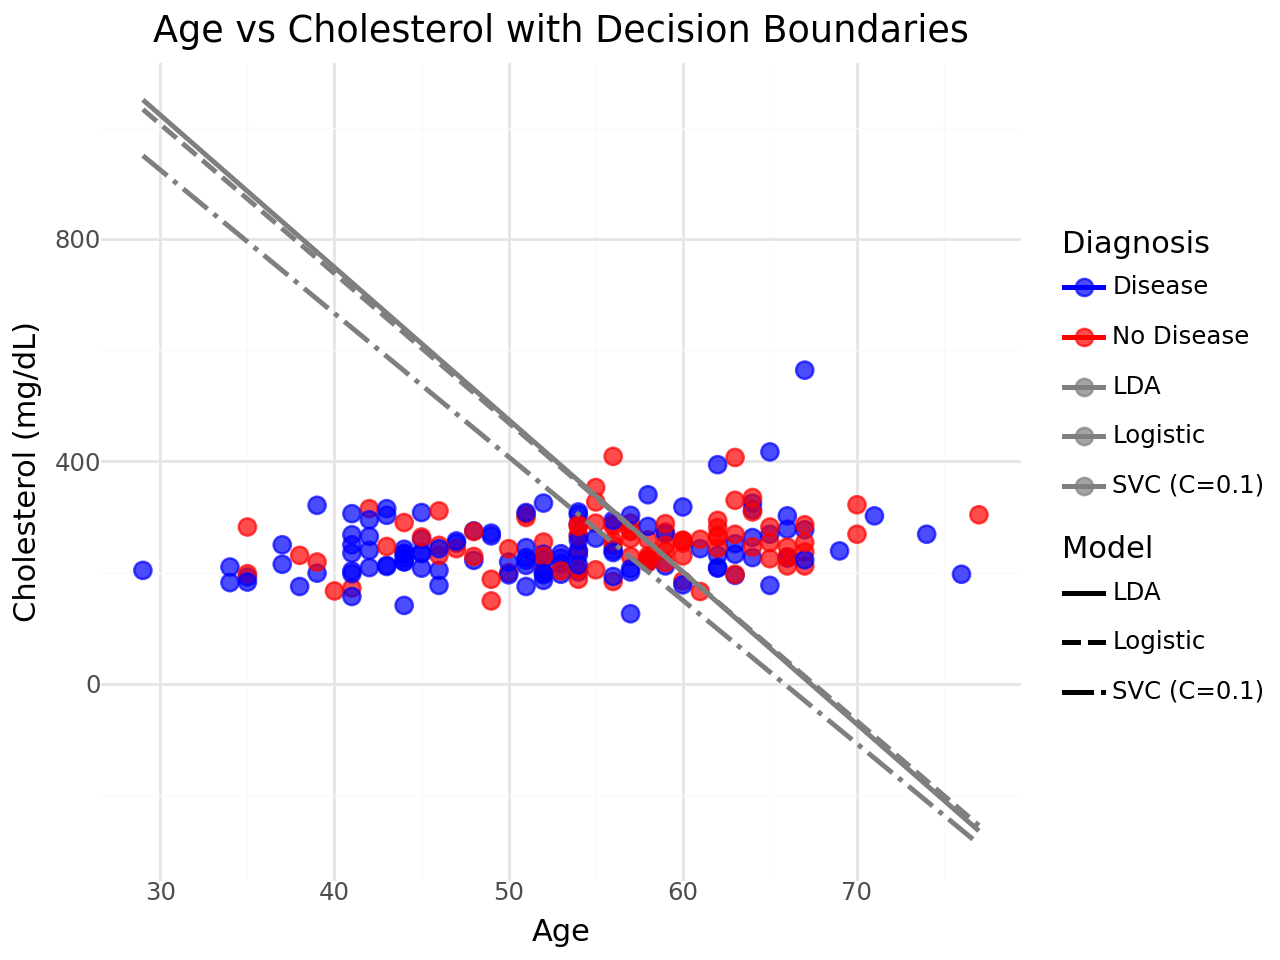

In [ ]:
from plotnine import *

age_vals = np.linspace(myData['age'].min(), myData['age'].max(), 200) #help from ChatGPT

b0_log = logReg.intercept_[0]
b_age_log, b_chol_log = logReg.coef_[0]
chol_log = -(b0_log + b_age_log * age_vals) / b_chol_log

b0_lda = ldaModel.intercept_[0]
b_age_lda, b_chol_lda = ldaModel.coef_[0]
chol_lda = -(b0_lda + b_age_lda * age_vals) / b_chol_lda

b0_svc = best_svc.intercept_[0]
b_age_svc, b_chol_svc = best_svc.coef_[0]
chol_svc = -(b0_svc + b_age_svc * age_vals) / b_chol_svc

boundary_df = pd.DataFrame({
    "age": np.concatenate([age_vals, age_vals, age_vals]),
    "chol": np.concatenate([chol_log, chol_lda, chol_svc]),
    "model": (["Logistic"] * len(age_vals)) +
             (["LDA"] * len(age_vals)) +
             (["SVC (C=0.1)"] * len(age_vals))
}) # online help

(
    ggplot(myData, aes(x='age', y='chol', color='diagnosis')) +
    geom_point(size=3, alpha=0.7) +
    geom_line(boundary_df, aes(x='age', y='chol', linetype='model', color='model'), size=1.0) +
    scale_color_manual(values=["blue", "red"]) +
    labs(
        title="Age vs Cholesterol with Decision Boundaries",
        x="Age",
        y="Cholesterol (mg/dL)",
        color="Diagnosis",
        linetype="Model"
    ) +
    theme_bw()
)